In [58]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import itertools
import statsmodels.api as sm

In [100]:
df1 = pd.read_csv("electric.csv")
df1.head()

,date,electric_production
0,01-01-1939,3.3842
1,01-02-1939,3.4100
2,01-03-1939,3.4875
3,01-04-1939,3.5133
4,01-05-1939,3.5133


In [101]:
# For a time-series model, the time parameter need's to be as a index
df1 = df1.set_index('date')

In [102]:
df1.index

Index(['01-01-1939', '01-02-1939', '01-03-1939', '01-04-1939', '01-05-1939',
       '01-06-1939', '01-07-1939', '01-08-1939', '01-09-1939', '01-10-1939',
       ...
       '01-04-2018', '01-05-2018', '01-06-2018', '01-07-2018', '01-08-2018',
       '01-09-2018', '01-10-2018', '01-11-2018', '01-12-2018', '01-01-2019'],
      dtype='object', name='date', length=961)

In [103]:
df1.index = pd.to_datetime(df1.index)

In [104]:
df1.index

DatetimeIndex(['1939-01-01', '1939-01-02', '1939-01-03', '1939-01-04',
               '1939-01-05', '1939-01-06', '1939-01-07', '1939-01-08',
               '1939-01-09', '1939-01-10',
               ...
               '2018-01-04', '2018-01-05', '2018-01-06', '2018-01-07',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2019-01-01'],
              dtype='datetime64[ns]', name='date', length=961, freq=None)

In [105]:
y = pd.Series(df1['electric_production'])

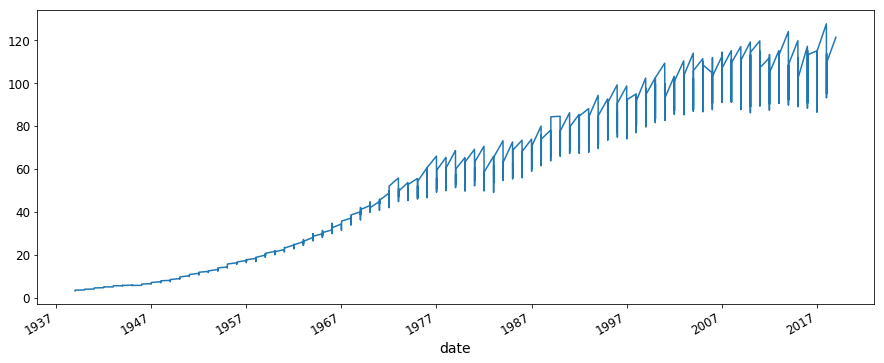

In [106]:
y.plot(figsize=(15, 6))
plt.show()

In [107]:
from statsmodels.tsa.arima_model import ARIMA
 
# fit model
model = ARIMA(y, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                               ARIMA Model Results                               
Dep. Variable:     D.electric_production   No. Observations:                  960
Model:                    ARIMA(5, 1, 0)   Log Likelihood               -2381.557
Method:                          css-mle   S.D. of innovations              2.887
Date:                   Wed, 13 Mar 2019   AIC                           4777.114
Time:                           13:48:09   BIC                           4811.182
Sample:                       01-02-1939   HQIC                          4790.088
                            - 01-01-2019                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1105      0.039      2.830      0.005       0.034       0.187
ar.L1.D.electric_production    -0.0186      0.032     -0

In [108]:
p =d= q = range(0, 2)
pdq = list(itertools.product(p, d, q))

In [109]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [110]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [111]:
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [112]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [113]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9381.823884160589
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4637.321127483272
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4556.592460635189
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4527.101034769676
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4641.2913866171475
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4477.963972189789
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9466.61927526884
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8198.079459692175
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4250.487982436818
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4191.072104470776
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4567.768000420709
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4548.049434946375
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4197.900940848593
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4192.303578426507
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5181.950583586047
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:3918.3107737960154
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4260.570505162597
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:3934.0177766064407
ARIMA(0,

In [114]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9623      0.010     92.468      0.000       0.942       0.983
ma.L1         -0.3463      0.022    -15.505      0.000      -0.390      -0.303
ma.S.L12      -0.6551      0.018    -36.190      0.000      -0.691      -0.620
sigma2         3.5199      0.096     36.486      0.000       3.331       3.709
